Interpretation For the First Video: 
[The spelled-out intro to neural networks and backpropagation: building micrograd](https://youtu.be/VMj-3S1tku0?si=8FQ4c7gDBBAXCdci)

This notebook has been created upon the suggestion by Neil sir to go through the Andrej Kaparthy video regarding Neural Networks.

Let's Title this notebook as:

# __BUILDING MICROGRAD__ 
_as it fits the video..._

# __Index:__
- [Takeaways](#takeaways)
- [Micrograd Overview](#micrograd)
    - [Explanation by an Example](#Example)

### __Takeaways__:
By the end of this Lecture, we will understand:

- The basic structure and purpose of neural networks.
- How to define and train a neural network using Micrograd.
- The step-by-step process of backpropagation and how it tunes weights.
- How an autograd engine works and its role in gradient calculation.
- Practical application and experimentation using Micrograd’s minimalistic approach.

```Bash
pip install numpy
pip install micrograd
pip install matplotlib
```
Execute the above commands in your shell to install the requirements for this Lecture.

### __Micrograd Overview__:
Micrograd is a small library that demonstrates how an automatic differentiation engine (autograd engine for short) works. It uses something called a computational graph (or expression graph) to keep track of operations between values. The main idea is to build this graph as you perform operations and then use [Backpropagation](#Backpropagation) to compute derivatives or gradients.
#### Example:

In [1]:
from micrograd.engine import Value
a = Value(-4.0)
b = Value(2.0)

Here, we create two Value objects: `a` with `-4.0` and `b` with `2.0`. These objects not only store their numerical values but also keep track of gradients and the operations they participate in.

In [2]:
c = a + b

The code `c = a + b` creates a Value object c that's the sum of `a` and `b`. This operation is stored in the computational graph, forming a simple graph with `c` dependent on `a` and `b`.

In [3]:
c += c + 1
c += 1 + c + (-a)

- `c += c + 1`: This statement updates the value of `c` by adding `c + 1` to it. The expression graph records `c`'s dependency on its previous value, another instance of itself, and the constant `1`.
- `c += 1 + c + (-a)`: This statement updates `c` by adding `1 + c + (-a)` to it. Now, `c` depends on the constant `1`, another instance of itself, and the negative of `a`. The computational graph continues to grow, with `c` linked to all these operations and values.

In [ ]:
print(c.data) #output: -1.0

The final value of `c` is `-1.0`, resulting from a sequence of additions and transformations involving `a` and `b`.

In [5]:
c.backward()

##### Backpropagation:
When you call `c.backward()`, Micrograd computes the gradients of `c` with respect to `a` and `b` by traversing the expression graph backwards. It applies the chain rule to determine how changes in `a` and `b` influence `c`. This is known as Backpropagation. Backpropagation is an algorithm used in neural networks to compute gradients. It works by propagating the error backward through the network, applying the chain rule to calculate the gradient of the loss function with respect to each weight. This enables the network to update weights and minimize the error, improving its performance during training.

In [ ]:
print(a.grad) #output: 3.0
print(b.grad) #output: 4.0

As a result:

* **Gradient of `a` (`a.grad`)**: `3.0`
* **Gradient of `b` (`b.grad`)**: `4.0`

This means:
* A small change in `a` causes a change in `c` three times as large.
* A small change in `b` causes a change in `c` four times as large.

The expression graph tracks all dependencies, and backpropagation efficiently calculates these gradients. This process is fundamental in neural networks, allowing for weight updates during training to minimize loss. Backpropagation applies to many operations, including in Multi-Layered Perceptrons (MLPs), where inputs and weights interact through matrix operations. Starting from `c`, the gradient is computed by applying the chain rule recursively to all nodes in the expression graph influencing `c`.

Neural Network are just mathematical expressions that take input data and weights as the input and output data are your predictions or the loss functions. But in the case of Backpropagation it is more general and it doesn't care about the network what it cares about are just mathematical expressions. And we use this for training of neural networks.

So Micrograd is basically what we need to train neural networks and everything else is just efficiency(usage of n-dimensional tensors and memory allocation). So You think that it could be a very complex piece of code but that turns out to not to be the case where you see that it is just [barely 100 lines of code of simple python](https://github.com/karpathy/micrograd/blob/master/micrograd/engine.py)
##### __Installation__:
Run the following command in your shell:
`pip install micrograd`


### __Implementing Micrograd__:
##### Derivative Of a Simple Function with One Input:
Derivatives quantify how changes in an input affect the output, showing the rate of change of a function. In neural networks, partial derivatives reveal each input’s impact on the output, crucial for adjusting parameters and optimizing models. Again let's deep dive to understand this with an 
##### __Example__:

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def f(x):
    return x**2-x-6
f(3)
abscissae=np.arange(-5,5,0.25)

Set of Values of x from -5 to 5 in steps of 0.25 but not including 5

In [ ]:
abscissae

After plotting those values we get a Parabola.

In [ ]:
ordinates=f(abscissae)
plt.plot(abscissae,ordinates)

### __Derivative of a Function__:
The Derivative shows how a function’s value changes with a small input change.
- If the function increases, the derivative is positive.
- If it decreases, the derivative is negative.
It indicates the direction and rate of change at that point.
So,
>$$f'(x) = \lim_{{h \to 0}} \frac{{f(x + h)-f(x)}}{h}$$
Executing this we get:

In [ ]:
h=0.001
x=2
(f(x+h)-f(x))/h

In Deep Learning, frameworks use backpropagation to automatically compute derivatives. For example, for $ f(x)=x^2-x-6 $, the derivative is $f'(x)=2x-1$. At $x=2$, it equals $3$, which matches the code output. Automatic differentiation makes manual calculation unnecessary.

Now Lets get a little bit more complex for this case i.e., $3$ inputs and $1$ output.

In [ ]:
a=1.0
b=2.0
c=3.0
r=a*b-c
print(r)

Now lets compute the Derivative of this function considering the small input change i.e., $h$ to be $0.001$ which shall be done with respect to $a$. So,

In [ ]:
h=0.0001
a+=h
H=a*b-c
print((H-r)/h)
a=1.0

The Result derived above is the Partial Derivative of the function $r$ i.e. $a*b-c$ with respect to $a$. The variable $a$ in this aspect is being restored to the original value since the derivative of the function $r$ changes as we run the above code block again and again which would be confusing to us.Which highlights a need to return variables to their initial state to avoid cumulative changes, which can otherwise misrepresent derivative calculations or confuse gradient tracking when rerunning code blocks. This happens because we are adding the value of $h$ again and again as we are rerunning the Code blocks.
>The partial derivative shows how a function's output varies with each input.

### __Starting The Core `Value` object of Micrograd and its Visualization:__
Now, let's move onto Neural Networks. Neural Networks consist of complex mathematical expressions managed through data structures like the `Value` object, which stores values and tracks gradients. Similar to resetting `a` after each derivative calculation, the `Value` object resets its state to avoid unintended changes, ensuring accurate gradient computations and efficient backpropagation for optimizing network parameters.
This Chapter, we are going to build out the `Value` object. Below is the Skeleton of the `Value` Object.

In [13]:
class Value:
    def __init__(self, data):
        self.data = data
    def __repr__(self):
        return f"Value(data={self.data})"
    def __add__(self,other): #this is defined explicitly for the addition of two `Value` objects
        return Value(self.data+other.data)
    def __mul__(self,other): #this is defined explicitly for the multiplication of two `Value` objects
        return Value(self.data*other.data)

`__repr__` is there to make the object more understandable when printed, instead of just showing the raw memory address
__`class Value`__ takes a single scalar value, wraps it, and represents it as __`Value(data=value)`__.

For example, if do a value of 2.0 if will return a string. `Value(data=2.0)`

In [ ]:
a=Value(2.0)
print(a)

If there is `grad=0` also appearing in result, it is because of multiple uses of `grad()` in previous code cells. 

##### __Linear Combination in `Value` Objects__
Let's multiply two `Value` objects and add another `Value` object.

In [ ]:
b=Value(-1.0)
c=Value(3.0)
print(a*b+c)

`a*b+c` in the above code cell will internally call:
>``` (a.__mul__(b)).__add__(c) ```

where `b,c` will be `other` respectively and `a` shall be `self`. Furthermore,
>`Value(self.data+other.data)`,`Value(self.data*other.data)`

is internally addition, multiplication of simple floating point objects respectively. This functions can be called as __operator overloading functions__.

### __Computation Graph and Dependencies__:
Here, we are missing the connections between nodes of this expression and are not tracking new values that are being produced with the previous values. This is one of the important things to be implemented for operations like __backpropagation__ to work where we traverse the graph in reverse to compute gradients.

In frameworks like PyTorch or TensorFlow, such dependency tracking is used to implement autograd, enabling automatic differentiation by traversing the graph of operations.

To implement this we introduce a new variable `children`, defaulting to an empty tuple, to track dependencies between values or it tracks which values produce others. Therefore the code shall be upgraded such as:

In [16]:
class Value:
    def __init__(self, data, _children=()):
        self.data=data
        self._prev=set(_children)
    def __repr__(self):
        return f"Value(data={self.data})"
    def __add__(self,other):
        return Value(self.data+other.data,(self,other))
    def __mul__(self,other):
        return Value(self.data*other.data,(self,other))

###### Changes in `Class Value`;
Above at line number 2 we give an empty tuple as a parameter to the constructor, at line number 4 `self._prev=set(_children)` is given for storing the unique dependencies of the current Value object using a set, we also pass `(self,other)` to the __operator overloading functions__ (i.e., `__add__`, `__mul__`) to link them to `_children` tuple in line number 8,9.

Now after passing the values of a, b, c...

In [ ]:
a=Value(2.0)
b=Value(-1.0)
c=Value(3.0)
d=a*b+c
print(f"{d}\n{d._prev}")

We get `d` as `Value(data=1.0)` and `d._prev` as `{Value(data=3.0), Value(data=-2.0)}`, where `Value(data=-2.0)` is from `a*b` and `Value(data=3.0)` is from `c`. 

_Remember that,_
- `d` returns the string representation of `d` because of the `__repr__` function
- `d._prev` contains the dependencies of `d` which is a set.

By here, we can track `Value` dependencies but not the operations that created them. So we need to make changes in the code so that we can also store the operations. These changes are necessary for precise __backpropagation__, and proper gradient attribution. Therefore, code shall be upgraded as:

In [18]:
class Value:
    def __init__(self,data,_children=(),_op=''):
        self.data=data
        self._prev=set(_children)
        self._op=_op
    def __repr__(self):
        return f"Value(data={self.data})"
    def __add__(self, other):
        return  Value(self.data+other.data,(self,other),'+')
    def __mul__(self, other):
         return Value(self.data*other.data,(self,other),'*')

Now, we are also tracking the operations:

In [ ]:
a=Value(2.0)
b=Value(-1.0)
c=Value(3.0)
d=a*b+c
print(f"{d}\n{d._prev}\n{d._op}")

Since `d._op` stores `'+'`, representing the last operation (`__add__`) performed to produce `d`.

This way we shall only know the last operation applied upon the `Value` object. But this doesn't reveal the relationships between each node and the sequence of operations which led to the final value.
Hence, we require a way to visualize the history of our `Value` objects. This is known as __Computational Graph Tracing__.

###### __Computation Graph__:
With the __Computation Graph__ we can:
- _Visualize Relationships and Computation Flow_: We recognize how operations connect values, revealing the sequence of operations and their nodes.
- _Identify Dependencies_: We know which values rely on others, from this we can trace and debug any errors caused in the process upto to their source.
- _Identify Bottlenecks_: We can understand nodes which require more resources and can optimize them for better efficiency.
- _Explain complex computations_: Visual graphs provide an intuitive way to explain complex computations to others.
To accomplish this, we have to make some changes in the previous code. We add a `label` attribute for our class constructor which is intended only for the Computation Graph.

In [1]:
class Value:
    def __init__(self,data,_children=(),_op='',label=''):
        self.data=data
        self._prev=set(_children)
        self._op=_op
        self.label=label
    def __repr__(self):
        return f"Value(data={self.data})"
    def __add__(self, other):
        return  Value(self.data+other.data,(self,other),'+')
    def __mul__(self, other):
         return Value(self.data*other.data,(self,other),'*')

Now the values passed shall change in acordance with the new attribute `label`:

In [8]:
a=Value(2.0,label='a')
b=Value(-1.0,label='b')
c=Value(3.0,label='c')
d=a*b+c;d.label='d'
print(f"{d}\n{d._prev}\n{d._op}")

Value(data=1.0)
{Value(data=3.0), Value(data=-2.0)}
+


__Remember__, When creating a new `Value` object using
1. The `Class Value` we pass the `label` as an arguement to the class _but_,
2. In the case of creating a new `Value` object using algebraic expression, we first write the expression lasting with the semicolon and then assign the `label` to the resulting `Value` object using `object.label = 'label_name'`. _Since_, Algebraic expressions like `a*b+c` create unlabeled intermediate `Value` objects during evaluation. Only after the full expression is assigned to `d` can `d.label` be set.

###### __Graph Generation__:
Now, Getting into generating Graphs, For which we require a bit of scary code...

__PreRequisites:__: To implement this section successfully, make sure that,
1. You have _downloaded_ and _installed_ latest version of __Graphviz__ from [Graphviz's Website](https://graphviz.org/download/)
2. You have checked an option during the process of installation i.e., 
   > Add Graphviz to the system PATH for all users
3. Restarted Python Kernel of your system and selected the system's Python as the Interpreter.

_Please note above mentioned points are all essential for smooth execution of this section._

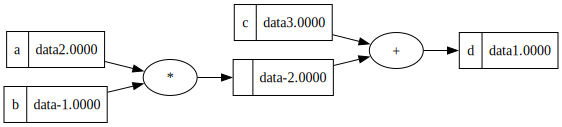

In [9]:
from graphviz import Digraph
#Enumerates all the nodes and edges -> builds a set for them
def trace(root):
    #builds a set of all nodes and edges in a graph
    nodes,edges=set(),set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes,edges
#Draw the graph
def draw_dot(root):
    dot=Digraph(format='svg',graph_attr={'rankdir':'LR'})# LR = left to right
    nodes,edges=trace(root)
    for n in nodes:
        uid=str(id(n))
        #for any value in the graph, create a rectangular ('record') node for it
        dot.node(name=uid,label="{%s|data%.4f}"%(n.label,n.data),shape='record')
        if n._op:
          # if this value is a result of some operation, create an op node for it
          dot.node(name=uid+n._op,label=n._op)
          # and connect this node to it
          dot.edge(uid+n._op,uid)
    for n1,n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)),str(id(n2))+n2._op)
    return dot
draw_dot(d)